C21102236

# Mounting Google Drive to access .csv file

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Data Exploration**

In [ ]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix

## Get Data

---

In [ ]:
dataFile = pd.read_csv('gdrive/My Drive/Colab Notebooks/Coursework_1_data.csv')

### Have an initia inspection of the data

In [ ]:
pd.set_option("display.max_columns", None, "max_colwidth", None, 'display.expand_frame_repr', False)
print('\nInformation of the dataset...... \n')
print(dataFile.info())
print('\nColumn names of the dataset...... \n', dataFile.columns)
print('\nBelow is the first few lines of the dataset......\n', dataFile.head(10))
print('\nBelow is the statistics of the dataset......\n', dataFile.describe())


Information of the dataset...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null 

## Scatter matrix

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6cd490a50>


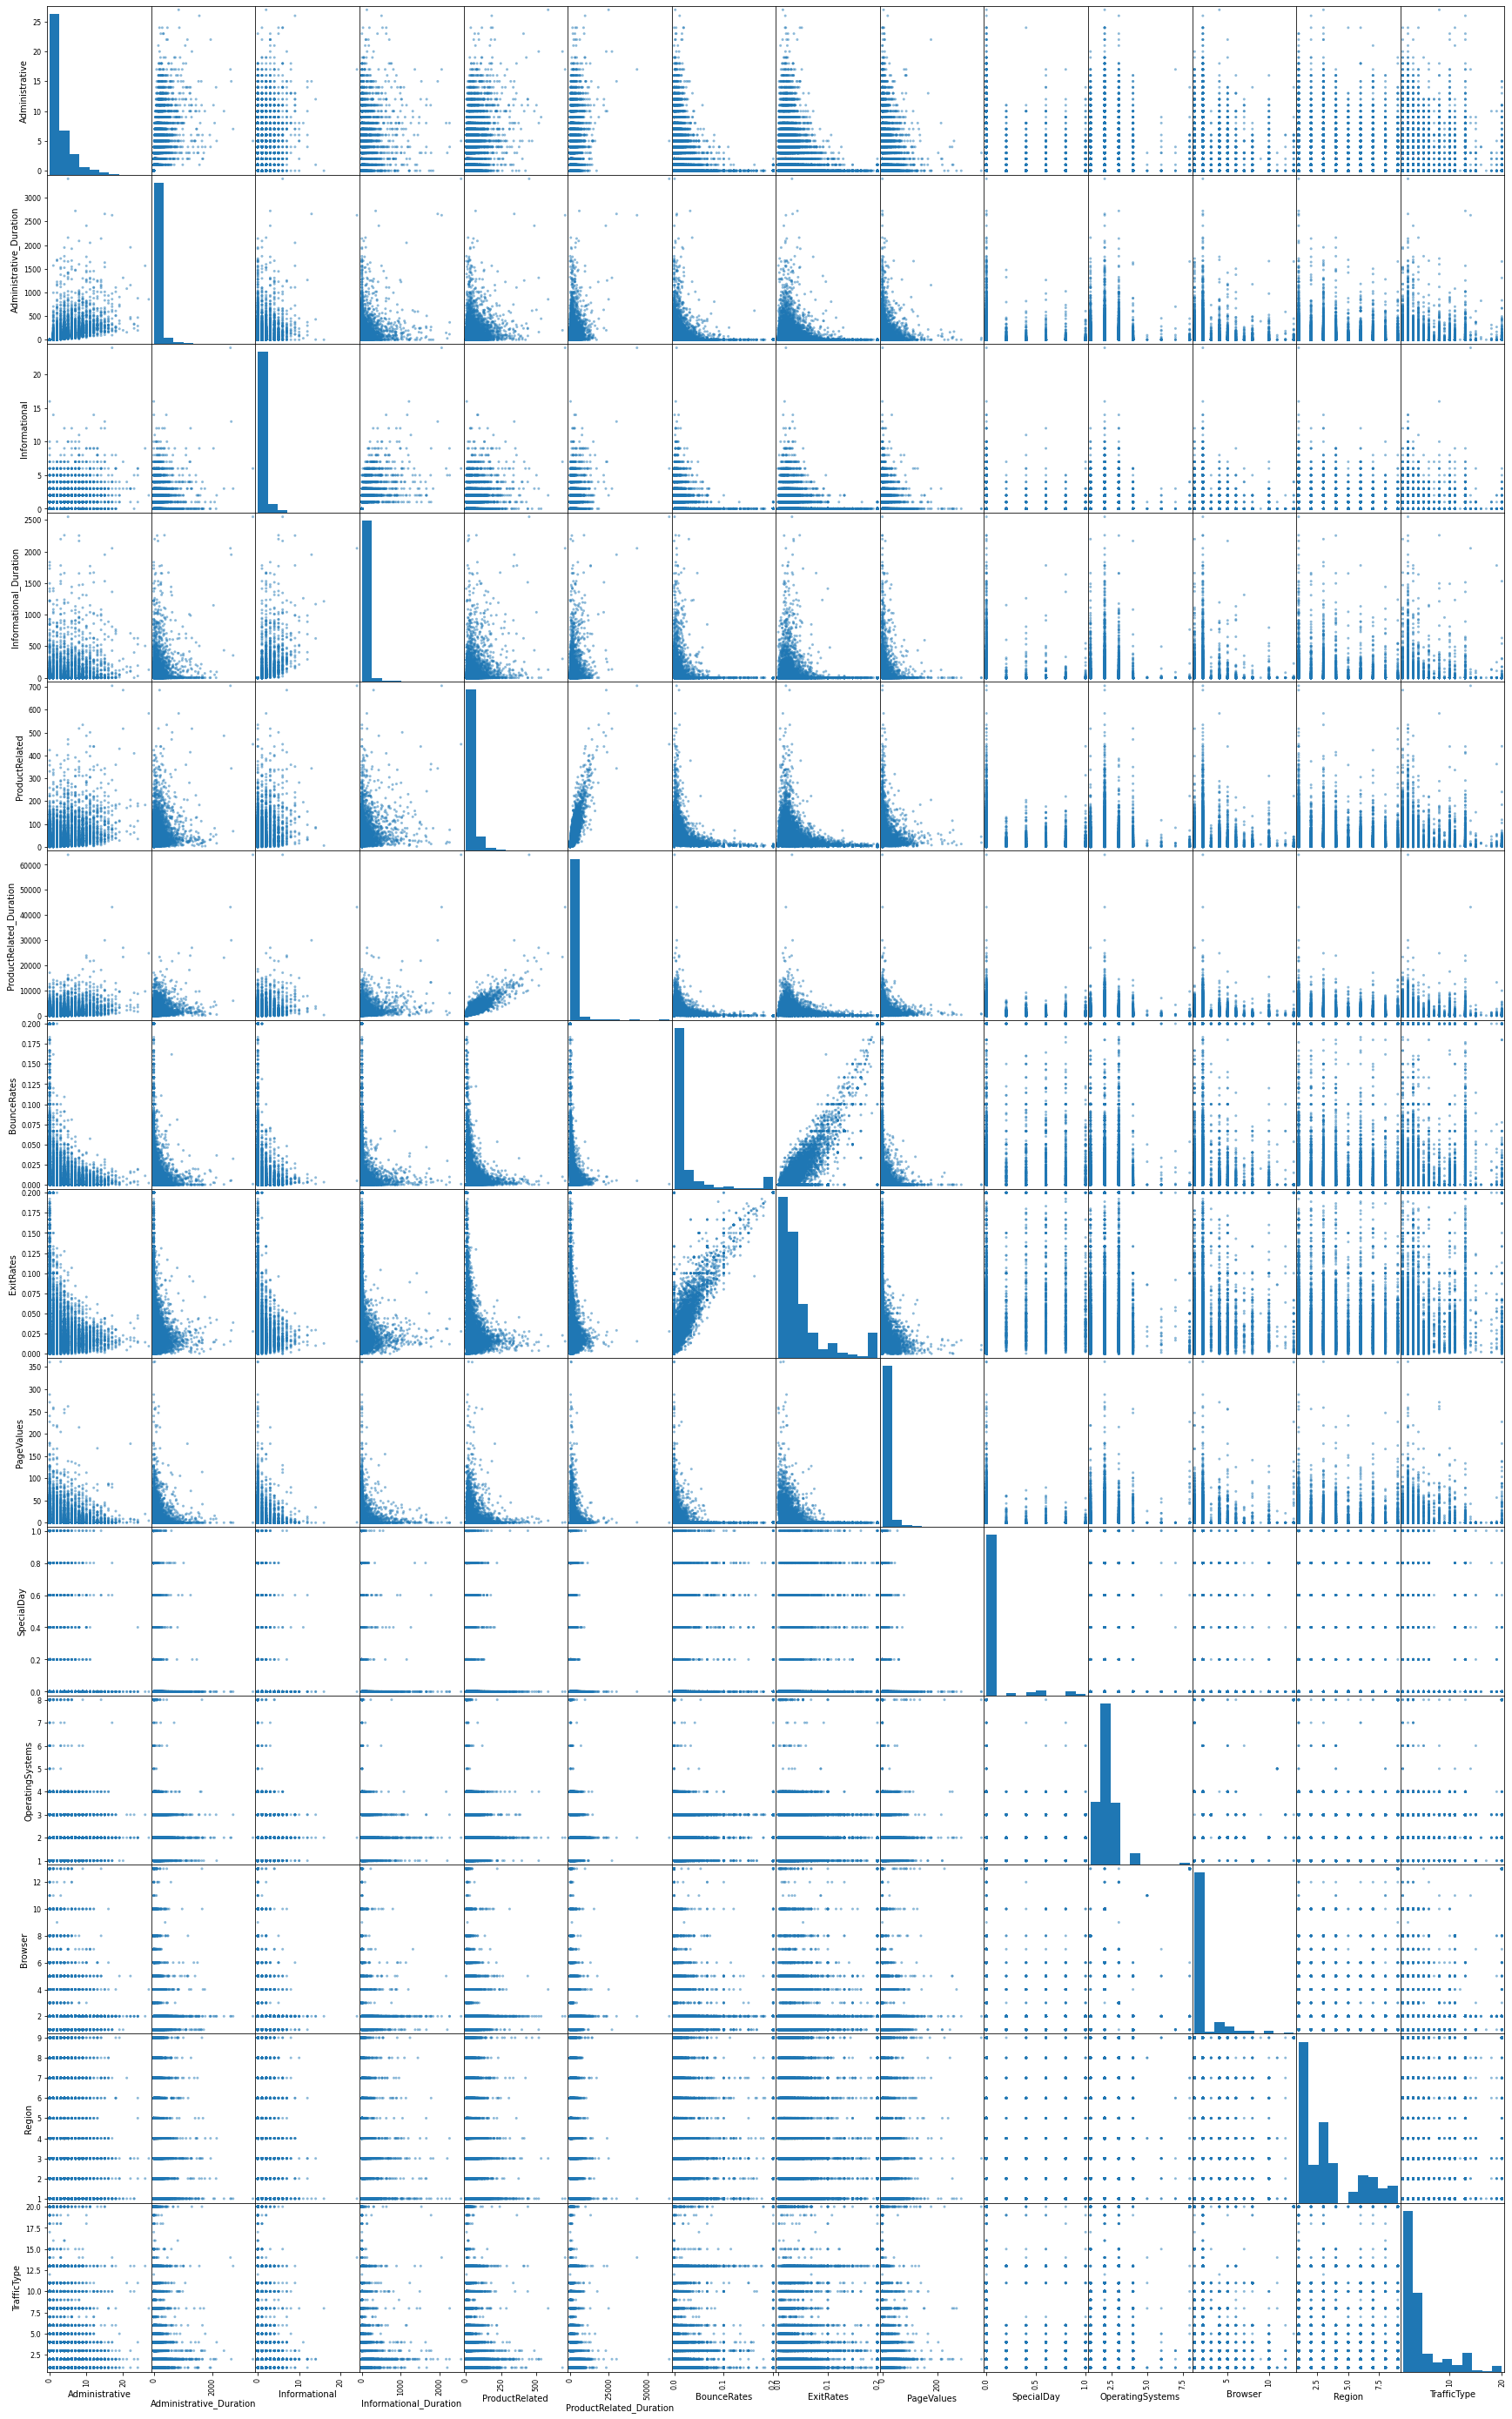

In [ ]:
print(scatter_matrix(dataFile[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay", "OperatingSystems", "Browser", "Region", "TrafficType"]], figsize = (30,50)))


## Scatter Plots

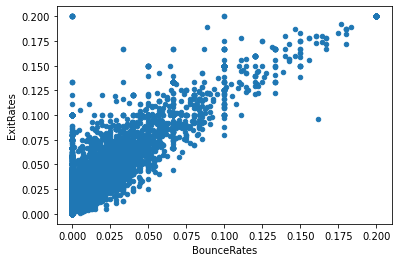

In [ ]:
dataFile.plot(kind = "scatter", x = "BounceRates", y = "ExitRates") # more bounce rate = more exit rate

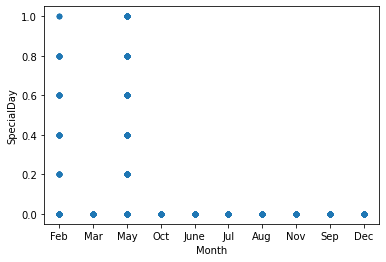

In [ ]:
dataFile.plot(kind = "scatter", x = "Month", y = "SpecialDay") # Feb and May only

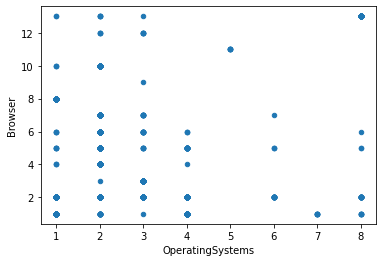

In [ ]:
dataFile.plot(kind = "scatter", x = "OperatingSystems", y = "Browser") # more OS = less browser, if OS == 5 => Browser == 11

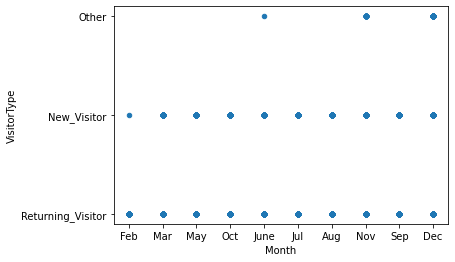

In [ ]:
dataFile.plot(kind = "scatter", x = "Month", y = "VisitorType") # other only in Jun, Nov and Dec

## Box Plot

        BounceRates     ExitRates
count  12330.000000  12330.000000
mean       0.022191      0.043073
std        0.048488      0.048597
min        0.000000      0.000000
25%        0.000000      0.014286
50%        0.003112      0.025156
75%        0.016813      0.050000
max        0.200000      0.200000


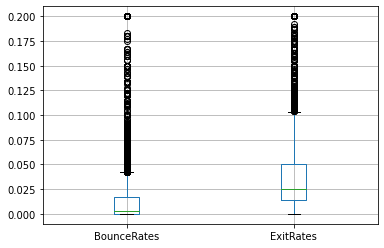

In [ ]:
print(dataFile[["BounceRates", "ExitRates"]].describe())
dataFile[["BounceRates", "ExitRates"]].boxplot()

## Correlation

In [ ]:
corr_matrix = dataFile.corr()
print(corr_matrix)

                         Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser    Region  TrafficType   Weekend   Revenue
Administrative                 1.000000                 0.601583       0.376850                0.255848        0.431119                 0.373939    -0.223563  -0.316483    0.098990   -0.094778         -0.006347 -0.025035 -0.005487    -0.033561  0.026417  0.138917
Administrative_Duration        0.601583                 1.000000       0.302710                0.238031        0.289087                 0.355422    -0.144170  -0.205798    0.067608   -0.073304         -0.007343 -0.015392 -0.005561    -0.014376  0.014990  0.093587
Informational                  0.376850                 0.302710       1.000000                0.618955        0.374164                 0.387505    -0.116114  -0.163666    0.048632   -0.048219         -0.0095

## Histogram

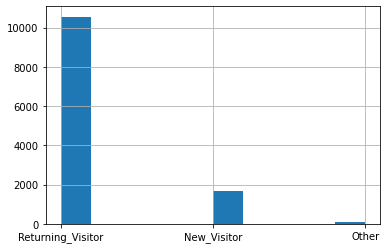

In [ ]:
dataFile["VisitorType"].hist()

# **Pre-processing Data**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## Dealing with missing values

In [ ]:
dataFile.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Encoding categorical features using feature scaling

### Encoding target feature ("Revenue")

In [ ]:
encoder = OrdinalEncoder()
dataFile[["Revenue"]] = encoder.fit_transform(dataFile[["Revenue"]])

### Encoding categorical features

In [ ]:
dataFile_y = dataFile["Revenue"]
dataFile_x = dataFile.drop("Revenue", axis = 1)
categorical_features = ["Month", "VisitorType", "Weekend", "OperatingSystems", "TrafficType", "Region", "Browser", ]
categorical_transformer = Pipeline(
    [
       
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

### Encoding numerical features

In [ ]:
numeric_features = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]
numeric_transformer = Pipeline(
    [
        
        ('scaler', StandardScaler())
    ]
)

### Combining them in a single ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)
dataFile_processed = preprocessor.fit_transform(dataFile_x)
print(dataFile_processed.shape)

(12330, 75)


## Split data into training set and test set

In [ ]:
y = dataFile["Revenue"]
X = dataFile_processed
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

## Balancing the data(Downsampling)

In [ ]:
y_majority = y[y==0]
y_minority = y[y==1]
y_majority_downsampled = resample(y_majority, 
                                 replace=False,    
                                 n_samples=49,     
                                 random_state=123) 
y = pd.concat([y_majority_downsampled, y_minority])

# **Model Implementation and Performance Evaluation**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  make_scorer, accuracy_score, classification_report, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

## Support Vector Machine

### Linear Kernel

In [ ]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print("\nLinear Kernel:")
print("Accuracy:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print(classification_report(y_test, prediction))


Linear Kernel:
Accuracy: 0.8859151121924844
Precision: 0.779874213836478
Recall: 0.41333333333333333
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93      3099
         1.0       0.78      0.41      0.54       600

    accuracy                           0.89      3699
   macro avg       0.84      0.70      0.74      3699
weighted avg       0.88      0.89      0.87      3699



### Radial Basis Function Kernel

In [ ]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print("\nRBF Kernel:")
print("Accuracy:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print(classification_report(y_test, prediction))


RBF Kernel:
Accuracy: 0.8929440389294404
Precision: 0.7684210526315789
Recall: 0.4866666666666667
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      3099
         1.0       0.77      0.49      0.60       600

    accuracy                           0.89      3699
   macro avg       0.84      0.73      0.77      3699
weighted avg       0.88      0.89      0.88      3699



### Polynomial Kernel

In [ ]:
svc_model  = SVC(kernel='poly')
print("\nPolynomial Kernel:")
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print(classification_report(y_test, prediction))


Polynomial Kernel:
Accuracy: 0.8864557988645579
Precision: 0.7795031055900621
Recall: 0.41833333333333333
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      3099
         1.0       0.78      0.42      0.54       600

    accuracy                           0.89      3699
   macro avg       0.84      0.70      0.74      3699
weighted avg       0.88      0.89      0.87      3699



### Sigmoid Kernel

In [ ]:
svc_model = SVC(kernel='sigmoid')
print("\nSigmoid Kernel:")
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print(classification_report(y_test, prediction))


Sigmoid Kernel:
Accuracy: 0.829683698296837
Precision: 0.47104247104247104
Recall: 0.4066666666666667
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      3099
         1.0       0.47      0.41      0.44       600

    accuracy                           0.83      3699
   macro avg       0.68      0.66      0.67      3699
weighted avg       0.82      0.83      0.82      3699



### Hyperparameter optimisation using grid search


In [ ]:
parameters = {'gamma':[0.1, 0.5, 1, 5], 'C':[0.001, 0.05, 1, 10, 1000]}
svc_model = SVC(kernel="rbf")
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
search = GridSearchCV(svc_model, parameters, scoring='accuracy', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
prediction = search.predict(X_test)
print("Best Hyperparameters:", result.best_params_)
print("Accuracy:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print(classification_report(y_test, prediction))

Best Hyperparameters: {'C': 1, 'gamma': 0.1}
Accuracy: 0.8940254122735874
Precision: 0.7736842105263158
Recall: 0.49
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      3099
         1.0       0.77      0.49      0.60       600

    accuracy                           0.89      3699
   macro avg       0.84      0.73      0.77      3699
weighted avg       0.89      0.89      0.88      3699



## Decision Tree

### Building the model

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

### Evaluating the model

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8637469586374696
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      3099
         1.0       0.58      0.58      0.58       600

    accuracy                           0.86      3699
   macro avg       0.75      0.75      0.75      3699
weighted avg       0.86      0.86      0.86      3699



### Plotting the tree

[Text(179.99473320076473, 212.91, 'X[73] <= -0.314\ngini = 0.257\nsamples = 8631\nvalue = [7323, 1308]'),
 Text(89.69430525396527, 203.85, 'X[7] <= 0.5\ngini = 0.074\nsamples = 6732\nvalue = [6472, 260]'),
 Text(53.86293443754721, 194.79, 'X[9] <= 0.5\ngini = 0.034\nsamples = 5158\nvalue = [5070, 88]'),
 Text(45.07730392041164, 185.73, 'X[3] <= 0.5\ngini = 0.026\nsamples = 4939\nvalue = [4873, 66]'),
 Text(33.57492506136707, 176.67, 'X[0] <= 0.5\ngini = 0.022\nsamples = 4722\nvalue = [4670, 52]'),
 Text(20.368883355362538, 167.60999999999999, 'X[1] <= 0.5\ngini = 0.017\nsamples = 4499\nvalue = [4460, 39]'),
 Text(11.647828549848944, 158.55, 'X[38] <= 0.5\ngini = 0.006\nsamples = 3507\nvalue = [3497, 10]'),
 Text(9.640672205438067, 149.49, 'X[65] <= 4.27\ngini = 0.005\nsamples = 3505\nvalue = [3496, 9]'),
 Text(7.143580060422961, 140.43, 'X[42] <= 0.5\ngini = 0.005\nsamples = 3501\nvalue = [3493, 8]'),
 Text(3.666616314199396, 131.37, 'X[69] <= -0.702\ngini = 0.003\nsamples = 3476\nvalu

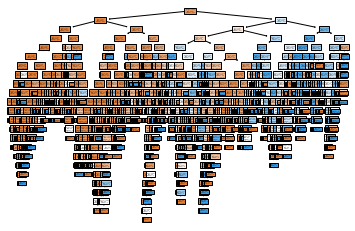

In [ ]:
plot_tree(clf, filled=True)

### Training the model

#### Finding the best max_depth for pruning using GridSearchCV

In [ ]:
max_depth = clf.get_depth()
max_depth_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42), scoring = make_scorer(accuracy_score), param_grid = ParameterGrid({"max_depth" : [[max_depth] for max_depth in range(1, max_depth + 1)]}))
max_depth_grid_search.fit(X_train, y_train)
best_max_depth_tree = max_depth_grid_search.best_estimator_
print(best_max_depth_tree)

DecisionTreeClassifier(max_depth=5, random_state=42)


#### Plotting the tree

[Text(167.4, 199.32, 'X[73] <= -0.314\ngini = 0.257\nsamples = 8631\nvalue = [7323, 1308]'),
 Text(83.7, 163.07999999999998, 'X[7] <= 0.5\ngini = 0.074\nsamples = 6732\nvalue = [6472, 260]'),
 Text(41.85, 126.83999999999999, 'X[9] <= 0.5\ngini = 0.034\nsamples = 5158\nvalue = [5070, 88]'),
 Text(20.925, 90.6, 'X[3] <= 0.5\ngini = 0.026\nsamples = 4939\nvalue = [4873, 66]'),
 Text(10.4625, 54.359999999999985, 'X[0] <= 0.5\ngini = 0.022\nsamples = 4722\nvalue = [4670, 52]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.017\nsamples = 4499\nvalue = [4460, 39]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.11\nsamples = 223\nvalue = [210, 13]'),
 Text(31.387500000000003, 54.359999999999985, 'X[66] <= -0.433\ngini = 0.121\nsamples = 217\nvalue = [203, 14]'),
 Text(26.15625, 18.119999999999976, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]'),
 Text(36.61875, 18.119999999999976, 'gini = 0.214\nsamples = 115\nvalue = [101, 14]'),
 Text(62.775000000000006, 90.6, 'X[70] <= -0.619\ngin

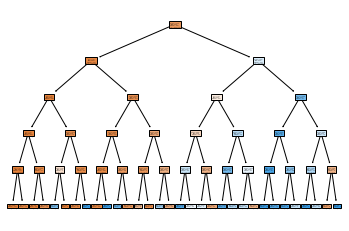

In [ ]:
plot_tree(best_max_depth_tree, filled=True)

#### Evaluating prunned tree

In [ ]:
y_pred = best_max_depth_tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8991619356582861
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3099
         1.0       0.69      0.69      0.69       600

    accuracy                           0.90      3699
   macro avg       0.81      0.82      0.82      3699
weighted avg       0.90      0.90      0.90      3699



## KNN

### Fit KNN into the dataset

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### Inspect model fit

In [ ]:
train_preds = knn_model.predict(X_train)
test_preds = knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

Accuracy: 0.8669910786699108
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      3099
         1.0       0.66      0.37      0.48       600

    accuracy                           0.87      3699
   macro avg       0.77      0.67      0.70      3699
weighted avg       0.85      0.87      0.85      3699



### Tuning and optimization of knn model

#### GridSearchCV

In [ ]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
print("Best k:", gridsearch.best_params_)
test_preds_grid = gridsearch.predict(X_test)
print("Accuracy:", accuracy_score(y_test, test_preds_grid))
print(classification_report(y_test, test_preds_grid))

Best k: {'n_neighbors': 21}
Accuracy: 0.8732089753987564
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3099
         1.0       0.77      0.31      0.44       600

    accuracy                           0.87      3699
   macro avg       0.83      0.65      0.68      3699
weighted avg       0.86      0.87      0.85      3699



#### Weighted Average

In [ ]:
parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
print("Best k:", gridsearch.best_params_)
test_preds_grid = gridsearch.predict(X_test)
print("Accuracy:", accuracy_score(y_test, test_preds_grid))
print(classification_report(y_test, test_preds_grid))

Best k: {'n_neighbors': 21, 'weights': 'uniform'}
Accuracy: 0.8732089753987564
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3099
         1.0       0.77      0.31      0.44       600

    accuracy                           0.87      3699
   macro avg       0.83      0.65      0.68      3699
weighted avg       0.86      0.87      0.85      3699



#### Bagging

In [ ]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
bagging_model = BaggingClassifier(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)
test_preds_grid = bagging_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, test_preds_grid))
print(classification_report(y_test, test_preds_grid))

Accuracy: 0.8740200054068668
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3099
         1.0       0.78      0.31      0.44       600

    accuracy                           0.87      3699
   macro avg       0.83      0.65      0.69      3699
weighted avg       0.86      0.87      0.85      3699

